<a href="https://www.kaggle.com/code/shencyjose/heart-disease-ann?scriptVersionId=188943012" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-csv/heart.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

2024-07-19 10:58:19.796456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 10:58:19.796686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 10:58:19.993163: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
ds=pd.read_csv("/kaggle/input/heart-csv/heart.csv")
ds.head()

/kaggle/input/heart-csv/heart.csv


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
ds.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: xlabel='output', ylabel='count'>

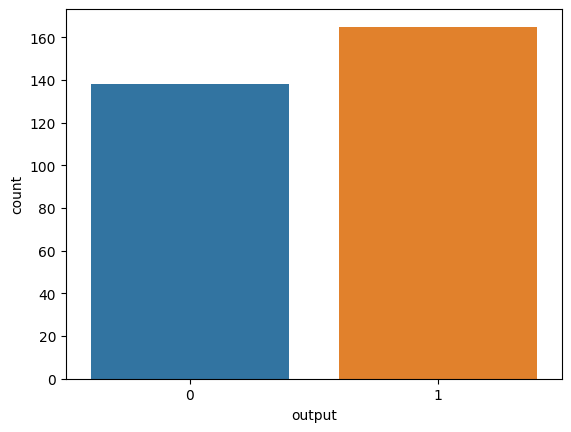

In [6]:
sns.countplot(x = 'output', data =ds)

In [7]:
ds.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

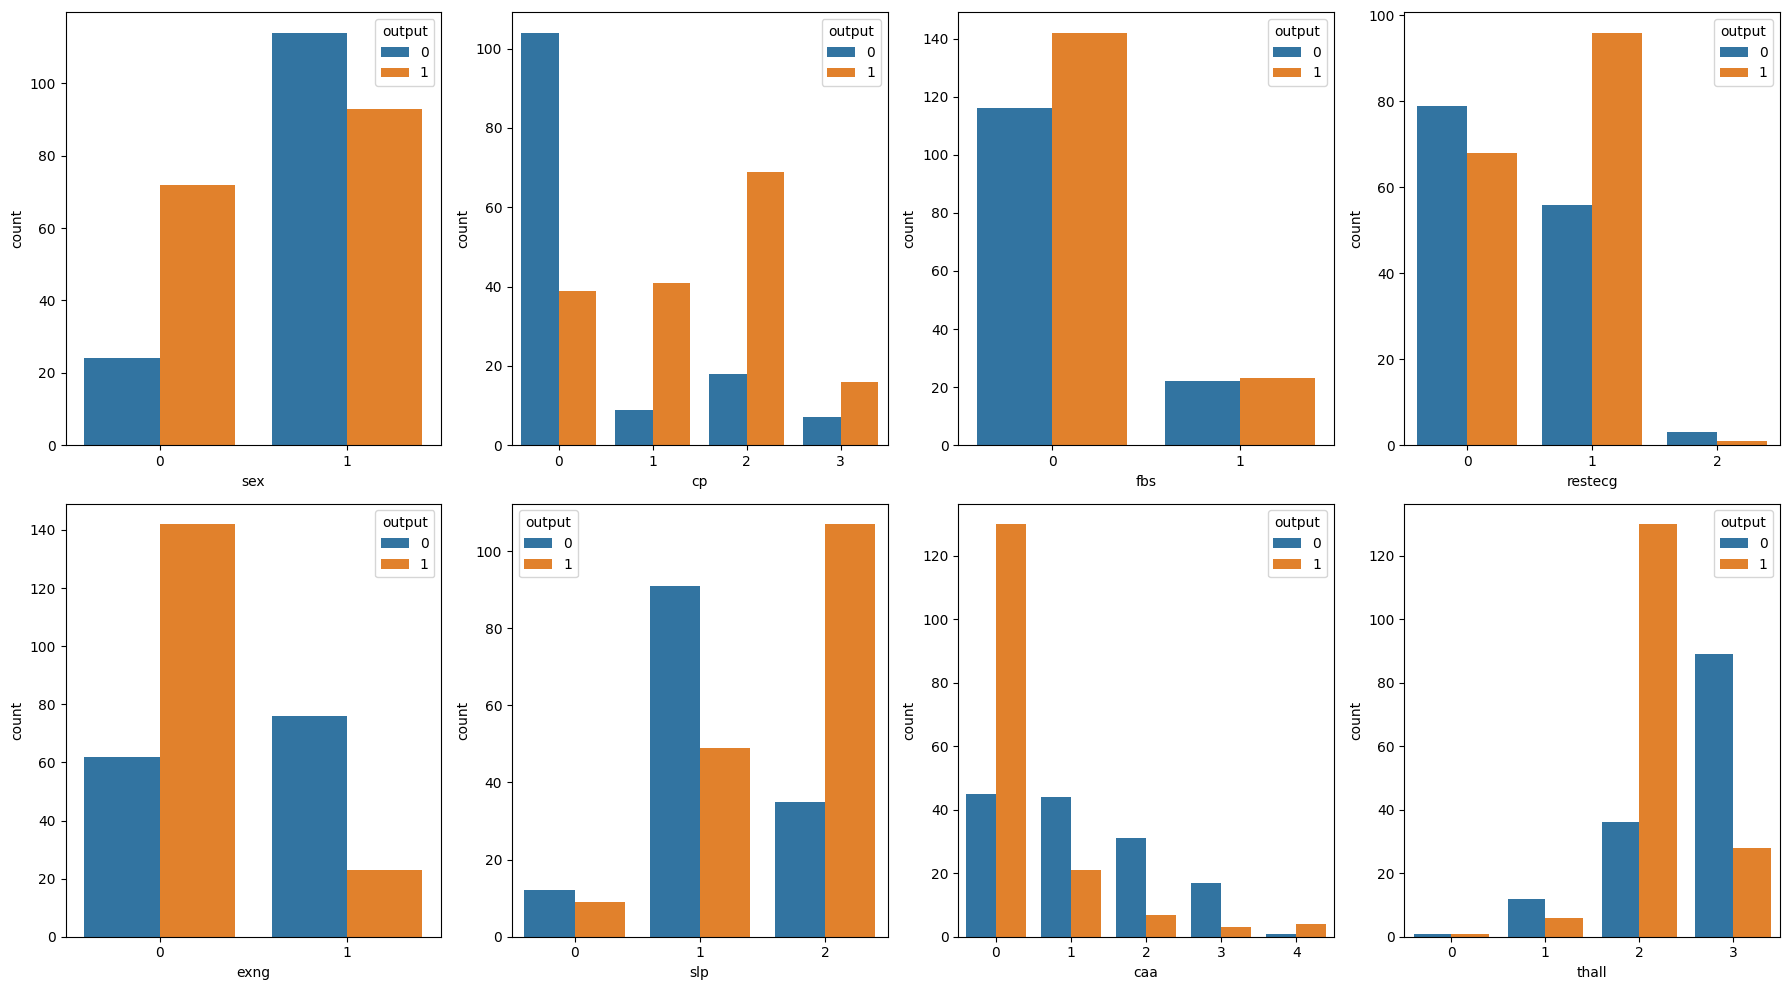

In [8]:
plt.figure(figsize=(18,10))
col = ['sex', 'cp', 'fbs', 'restecg','exng', 'slp', 'caa', 'thall',]
c = 1
for i in col:
    if c < 9:
        plt.subplot(2,4,c)
        sns.countplot(x = i,data =ds,hue = 'output')
        plt.xlabel(i)
    c += 1
    plt.tight_layout()

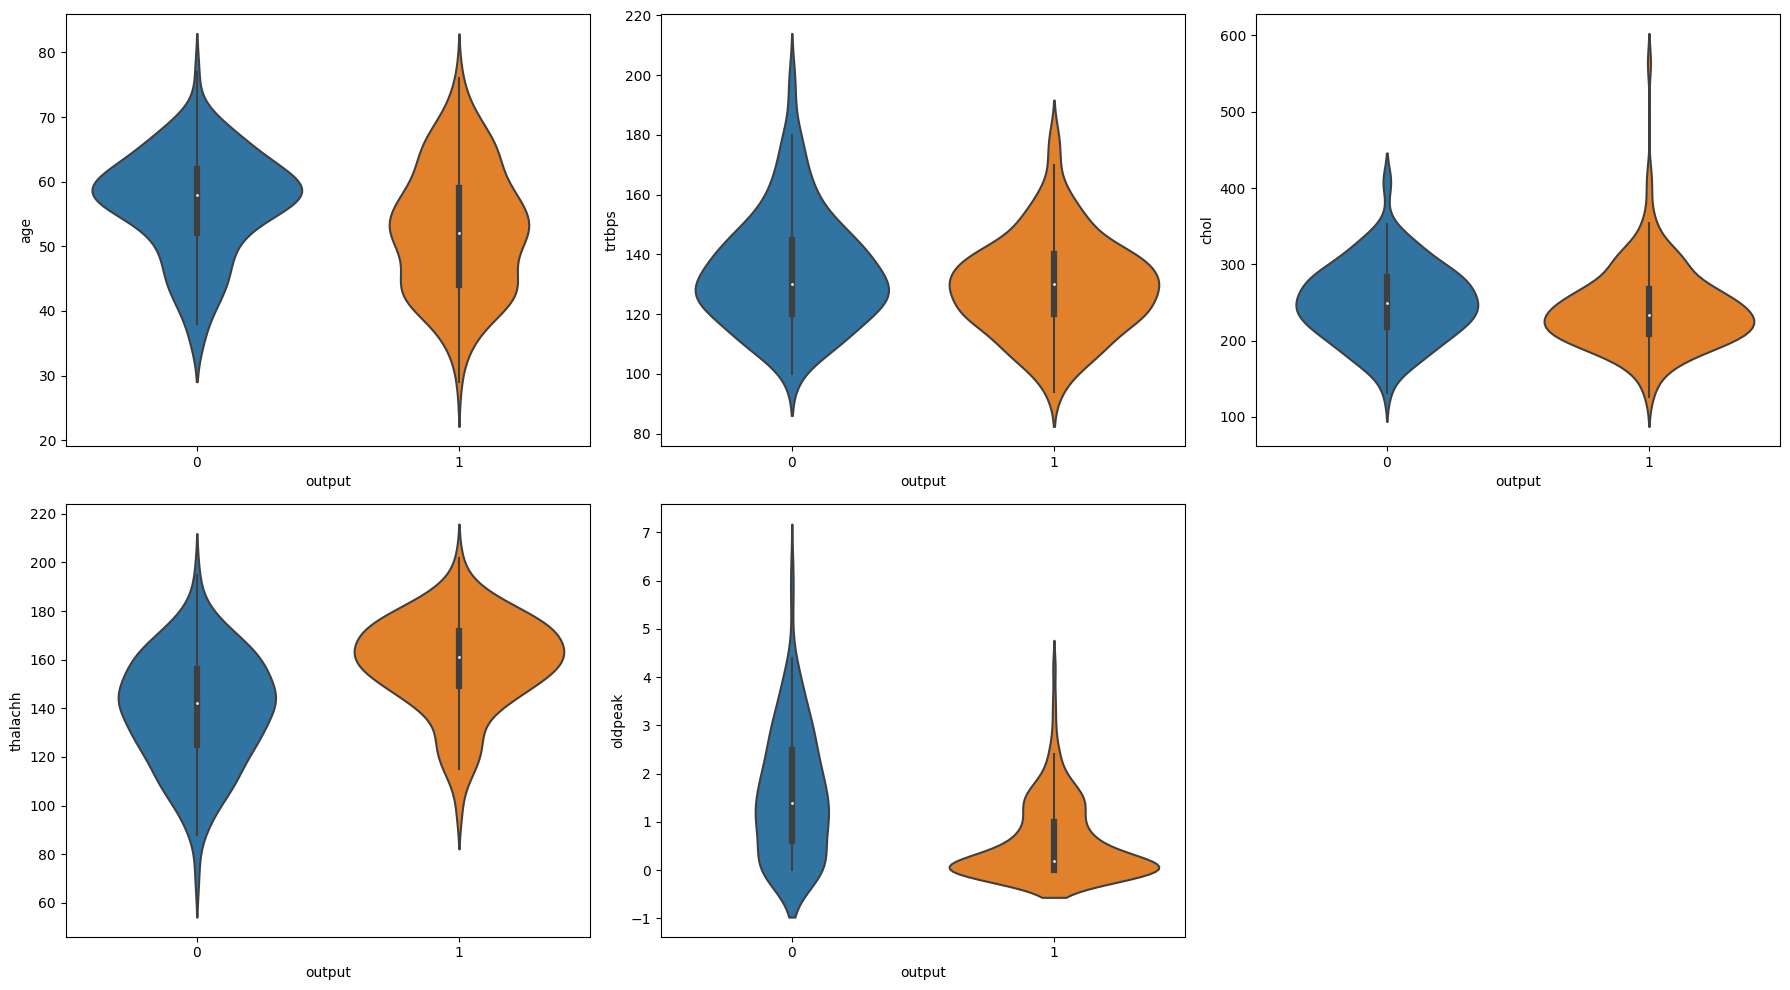

In [9]:
plt.figure(figsize=(18,10))
col = ['age','trtbps', 'chol','thalachh','oldpeak']
c = 1
for i in col:
    if c < 6:
        plt.subplot(2,3,c)
        sns.violinplot(y = i,x = 'output', data =ds)
    c += 1
    plt.tight_layout()

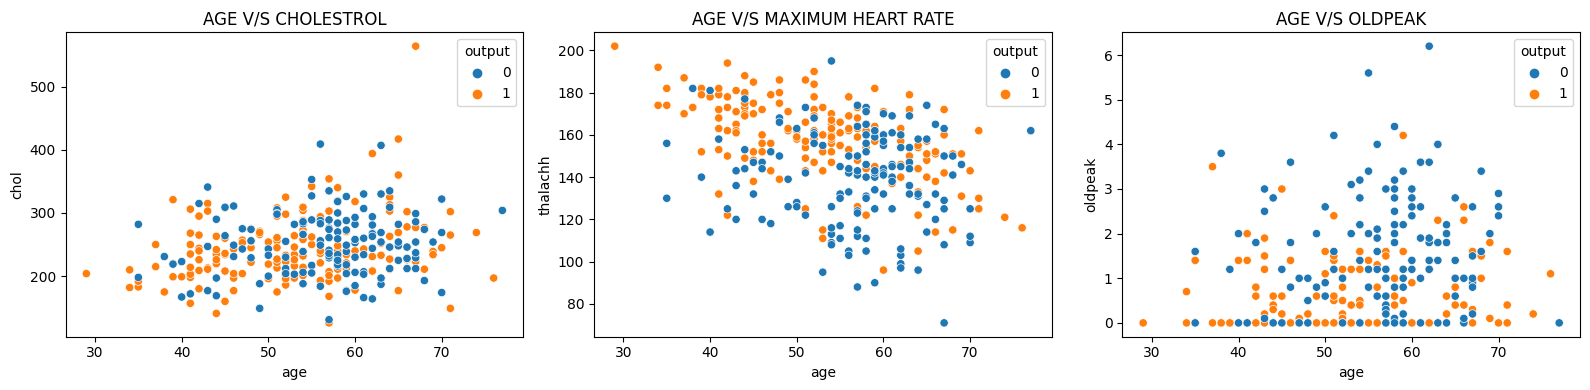

In [10]:
plt.figure(figsize=(16,4))

#RELATION BETWEEN AGE AND CHOLESTROL
plt.subplot(1,3,1)
sns.scatterplot(x = 'age', y = 'chol', data =ds,hue = 'output')
plt.title('AGE V/S CHOLESTROL')

#RELATION BETWEEN AGE AND MAXIMUM HEART RATE
plt.subplot(1,3,2)
sns.scatterplot(x = 'age', y = 'thalachh', data =ds,hue = 'output')
plt.title('AGE V/S MAXIMUM HEART RATE')

#RELATION BETWEEN AGE AND OLDPEAK
plt.subplot(1,3,3)
sns.scatterplot(x = 'age', y = 'oldpeak', data =ds,hue = 'output')
plt.title('AGE V/S OLDPEAK')

plt.tight_layout()

<Axes: >

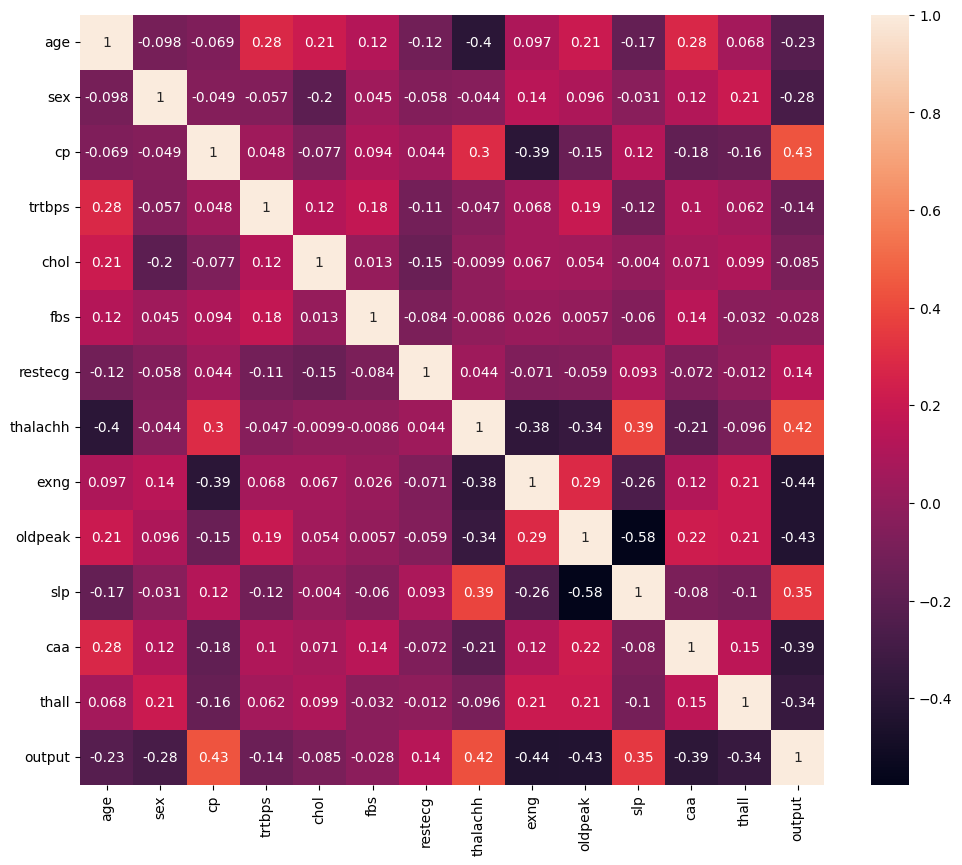

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(ds.corr() ,annot = True)

In [12]:
from numpy.random import seed
seed(0)
tf.random.set_seed(0)

In [13]:
#defining dependent and independent variables
x = ds.drop('output', axis=1)
y = ds['output']

In [14]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
#applying feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = tf.keras.models.Sequential()

#ADDING FIRST HIDDEN LAYER WITH 24 NEURONS, THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(tf.keras.layers.Dense(units = 24,activation = 'relu'))

#ADDING 2ND HIDDEN LAYER WITH 24 NEURONS
ann.add(tf.keras.layers.Dense(units = 24,activation = 'relu'))

#ADDING 3RD HIDDEN LAYER WITH 12 NEURONS
ann.add(tf.keras.layers.Dense(units = 12,activation = 'relu'))


#ADDING OUTPUT LAYER WITH 1 NEURON , AS THIS IS A BINARY CLASSIFICATION
ann.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

#COMPILING THE ANN USING STOCHASTIC GRADIENT DESCENT (optimizer = 'adam')
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


#TRAINING THE ANN WITH BATCH SIZE OF 32 (THIS IS A BATCH LEARNING)
ann.fit(x_train, y_train,batch_size = 32, epochs = 50)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4838 - loss: 0.8278
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4771 - loss: 0.7449 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5459 - loss: 0.6897 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6583 - loss: 0.6521 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7548 - loss: 0.6239 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.5974 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8138 - loss: 0.5688 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8084 - loss: 0.5385 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8117 - loss: 0.5069 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8120 - loss: 0.4759 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.4474 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8310 - loss: 0.4221 
Ep

<Axes: >

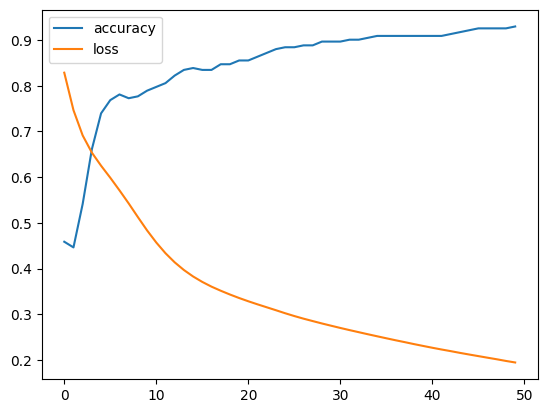

In [17]:
losses = pd.DataFrame(ann.history.history)
losses.plot()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Accuracy - 83.61%


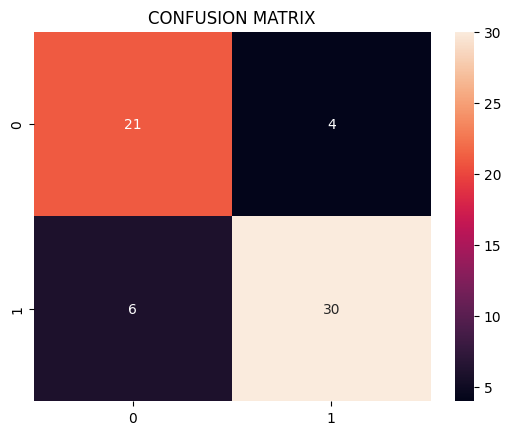

In [18]:
#GETTING ACCURACY AND CONFUSION MATRIX
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = ann.predict(x_test)
y_pred  = y_pred > 0.5
cm = confusion_matrix(y_pred,y_test)
ac = accuracy_score(y_pred,y_test)

sns.heatmap(cm,annot = True)
plt.title('CONFUSION MATRIX')
print('Accuracy - {0:.2f}%'.format(ac*100))